# Optogenetics Example Session

In [1]:
from stream_nwbfile import stream_nwbfile
import numpy as np
import matplotlib.pyplot as plt

This notebook showcases one example session from the 000971 dataset containing operant behavior and concurrent excitatory optogenetic stimulation.

In [2]:
DANDISET_ID = '000971'
file_path = 'sub-119-416/sub-119-416_ses-Opto-DMS-Excitatory-ChR2-2020-10-20T13-00-57_ogen.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

root pynwb.file.NWBFile at 0x5099719552
Fields:
  devices: {
    Optogenetics_LED_Dual <class 'pynwb.device.Device'>
  }
  experiment_description: Compulsive behavior is a defining feature of disorders such as substance use disorders. Current evidence suggests that corticostriatal circuits control the expression of established compulsions, but little is known about the mechanisms regulating the development of compulsions. We hypothesized that dopamine, a critical modulator of striatal synaptic plasticity, could control alterations in corticostriatal circuits leading to the development of compulsions (defined here as continued reward seeking in the face of punishment). We used dual-site fiber photometry to measure dopamine axon activity in the dorsomedial striatum (DMS) and the dorsolateral striatum (DLS) as compulsions emerged. Individual variability in the speed with which compulsions emerged was predicted by DMS dopamine axon activity. Amplifying this dopamine signal accelerated animals' transitions to compulsion, whereas inhibition delayed it. In contrast, amplifying DLS dopamine signaling had no effect on the emergence of compulsions. These results establish DMS dopamine signaling as a key controller of the development of compulsive reward seeking.
  experimenter: ['Seiler, Jillian L.' 'Cosme, Caitlin V.' 'Sherathiya, Venus N.'
 'Schaid, Michael D.' 'Bianco, Joseph M.' 'Bridgemohan, Abigael S.'
 'Lerner, Talia N.']
  file_create_date: [datetime.datetime(2024, 6, 11, 13, 11, 5, 817671, tzinfo=tzoffset(None, -25200))]
  identifier: fc40e324-a189-49ed-8e65-81e994c0d698
  institution: Northwestern Unitersity
  keywords: <StrDataset for HDF5 dataset "keywords": shape (9,), type "|O">
  lab: Lerner
  notes: Hemisphere with DMS: Right
Experiment: DMS Excitatory
Behavior: RI60
Punishment Group: nan
Did Not Learn: False

  ogen_sites: {
    OptogeneticStimulusSite <class 'pynwb.ogen.OptogeneticStimulusSite'>
  }
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://doi.org/10.1016/j.cub.2022.01.055']
  session_description: FR1 Training with optogenetic stimulation, rewards delivered on both left and right nose pokes, optogenetic stimulation delivered on all rewarded nose pokes
  session_id: Opto-DMS-Excitatory-ChR2-2020-10-20T13-00-57
  session_start_time: 2020-10-20 13:00:57-05:51
  source_script: Created using NeuroConv v0.4.11
  source_script_file_name: /opt/anaconda3/envs/lerner_lab_to_nwb_env/lib/python3.12/site-packages/neuroconv/basedatainterface.py
  stimulus: {
    OptogeneticSeries <class 'pynwb.ogen.OptogeneticSeries'>
  }
  stimulus_notes: Excitatory stimulation on rewarded nosepokes
  subject: subject pynwb.file.Subject at 0x5099724016
Fields:
  age: P10W/
  age__reference: birth
  description: Male and female WT (C57BL/6J) and (DAT)::IRES-Cre knockin mice (JAX006660) were obtained from The Jackson Laboratory and crossed in house. Only heterozygote transgenic mice, obtained by backcrossing to C57BL/6J wildtypes, were used for experiments. Littermates of the same sex were randomly assigned to experimental groups (fiber photometry-14 males, 22 females; DMS excitatory optogenetics- 20 males, 19 females; DMS inhibitory optogenetics- 13 males, 13 females; DLS excitatory optogenetics- 18 males, 18 females). Adult mice at least 10 weeks of age were used in all experiments. Mice were group housed under a conventional 12 h light cycle (dark from 7:00pm to 7:00am) with ad libitum access to food and water prior to operant training. All experiments were approved by the Northwestern University Institutional Animal Care and Use Committee.
  genotype: DAT-IRES-Cre: B6.SJLSlc6a3tm1.1(cre)Bkmn/J
  sex: F
  species: Mus musculus
  strain: C57BL/6J
  subject_id: 119.416

  surgery: ChR2 in DMS projecting SNc, probe in DMS
  timestamps_reference_time: 2020-10-20 13:00:57-05:51

Retrieve Optogenetic and Behavioral Data

In [3]:
# Optogenetic Stimulation
optogenetic_stimulation_timestamps = nwbfile.stimulus['OptogeneticSeries'].timestamps[:]
optogenetic_stimulation_data = nwbfile.stimulus['OptogeneticSeries'].data[:]
opto_onset_times = optogenetic_stimulation_timestamps[optogenetic_stimulation_data == 0.015]
opto_offset_times = optogenetic_stimulation_timestamps[optogenetic_stimulation_data == 0]

# Behavior
right_nose_poke_times = nwbfile.processing['behavior'].data_interfaces['right_nose_poke_times'].timestamps[:]
right_reward_times = nwbfile.processing['behavior'].data_interfaces['right_reward_times'].timestamps[:]
reward_port_entry_times = nwbfile.processing['behavior'].data_interfaces['reward_port_entry_times'].timestamps[:]

Plot

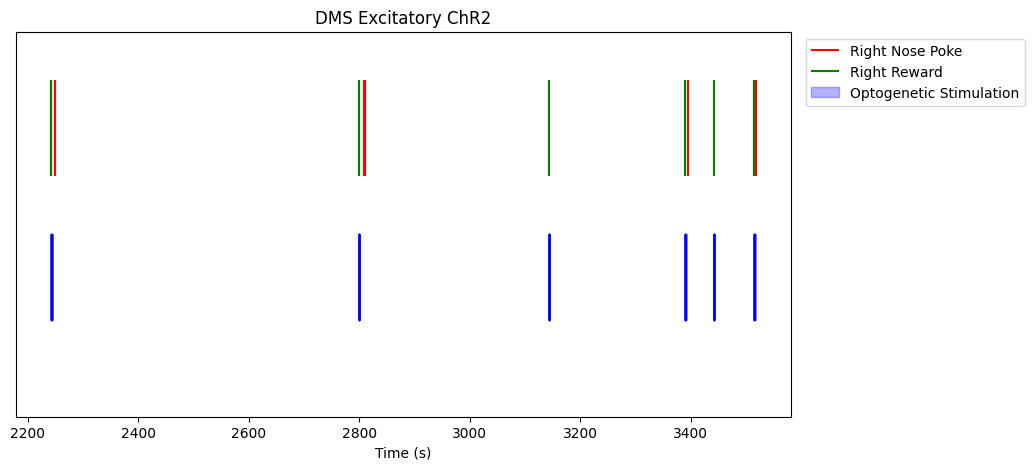

In [4]:
t_start = 1
t_end = 3600
right_nose_poke_mask = np.logical_and(right_nose_poke_times >= t_start, right_nose_poke_times < t_end)
right_reward_mask = np.logical_and(right_reward_times >= t_start, right_reward_times < t_end)
reward_port_entry_mask = np.logical_and(reward_port_entry_times >= t_start, reward_port_entry_times < t_end)
opto_onset_mask = np.logical_and(opto_onset_times >= t_start, opto_onset_times < t_end)
opto_offset_mask = np.logical_and(opto_offset_times >= t_start, opto_offset_times < t_end)
lineoffsets = 1
linelengths = 1
alpha = 0.3
ylim = [-2, 2]
y = np.arange(-1, 0, 0.1)

fix, ax = plt.subplots(figsize=(10, 5))
ax.eventplot(right_nose_poke_times[right_nose_poke_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='r', label='Right Nose Poke')
ax.eventplot(right_reward_times[right_reward_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='g', label='Right Reward')
for i, (onset_time, offset_time) in enumerate(zip(opto_onset_times[opto_onset_mask], opto_offset_times[opto_offset_mask])):
    x1 = onset_time*np.ones(len(y))
    x2 = offset_time*np.ones(len(y))
    if i == 0:
        ax.fill_betweenx(y, x1, x2, color='b', alpha=alpha, label='Optogenetic Stimulation')
    else:
        ax.fill_betweenx(y, x1, x2, color='b', alpha=alpha)
ax.set_ylim(ylim)
ax.set_title('DMS Excitatory ChR2')
ax.yaxis.set_visible(False)
ax.set_xlabel('Time (s)')
_ = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

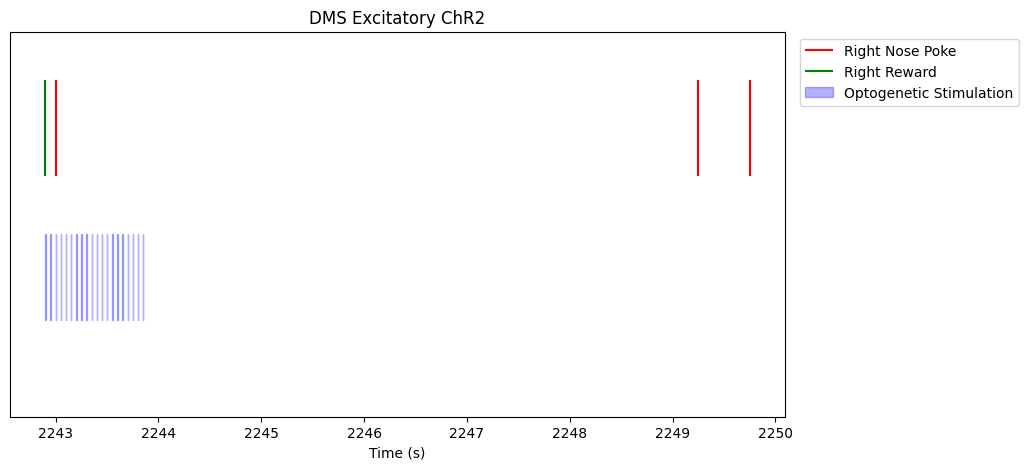

In [5]:
t_start = 2200
t_end = 2250
right_nose_poke_mask = np.logical_and(right_nose_poke_times >= t_start, right_nose_poke_times < t_end)
right_reward_mask = np.logical_and(right_reward_times >= t_start, right_reward_times < t_end)
reward_port_entry_mask = np.logical_and(reward_port_entry_times >= t_start, reward_port_entry_times < t_end)
opto_onset_mask = np.logical_and(opto_onset_times >= t_start, opto_onset_times < t_end)
opto_offset_mask = np.logical_and(opto_offset_times >= t_start, opto_offset_times < t_end)
lineoffsets = 1
linelengths = 1
alpha = 0.3
ylim = [-2, 2]
y = np.arange(-1, 0, 0.1)

fix, ax = plt.subplots(figsize=(10, 5))
ax.eventplot(right_nose_poke_times[right_nose_poke_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='r', label='Right Nose Poke')
ax.eventplot(right_reward_times[right_reward_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='g', label='Right Reward')
for i, (onset_time, offset_time) in enumerate(zip(opto_onset_times[opto_onset_mask], opto_offset_times[opto_offset_mask])):
    x1 = onset_time*np.ones(len(y))
    x2 = offset_time*np.ones(len(y))
    if i == 0:
        ax.fill_betweenx(y, x1, x2, color='b', alpha=alpha, label='Optogenetic Stimulation')
    else:
        ax.fill_betweenx(y, x1, x2, color='b', alpha=alpha)
ax.set_ylim(ylim)
ax.set_title('DMS Excitatory ChR2')
ax.yaxis.set_visible(False)
ax.set_xlabel('Time (s)')
_ = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')